# **Citarum Water**

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load dataset
file_path = "/content/CitarumWater.csv"  # Sesuaikan jika perlu
data = pd.read_csv(file_path)
print("Data Head:")
print(data.head())
print("\nColumns:", data.columns)
print("\nMissing Values:", data.isnull().sum())



Data Head:
   No NamaSungai             TitikPantau       Waktu    pH     Temp   TSS  \
0   1    Citarum             Wangisagara  18/04/2018  7.57  25.55°C  11.0   
1   2    Citarum                   Koyod  18/04/2018  7.69  25.55°C  13.0   
2   3    Citarum   Setelah IPAL Cisirung  18/04/2018  7.39  25.55°C  15.0   
3   4    Citarum                 Nanjung  18/04/2018  7.49  25.55°C  17.0   
4   5    Citarum  Outlet Waduk Jatiluhur  18/04/2018  7.17  25.55°C   6.0   

     DO   BOD    COD  Nitrat  FecalColiform  Fosfat O2    IP  Class  
0  6.11  3.30   6.10    1.08        17000.0   0.043  -  5.12      3  
1  6.20  5.31  12.50    1.85        28000.0   0.011  -  5.91      3  
2  3.61  7.40  23.50    1.25        90000.0   0.230  -  7.76      3  
3  3.17  8.13  27.50    1.21       300000.0   0.057  -  9.61      3  
4  6.82  2.89   5.44    1.04         3000.0   0.110  -  2.44      2  

Columns: Index(['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'pH', 'Temp', 'TSS', 'DO',
       'BOD', 'COD

In [4]:

# Assume the last column is the target and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC: {auc_score:.4f}')


Accuracy: 0.8880
Precision: 0.8615
Recall: 0.7343
F1 Score: 0.7768
AUC: 0.9696


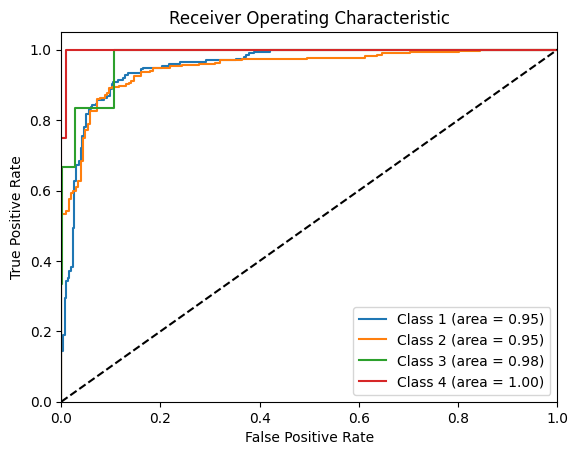

In [6]:

# Plot ROC curve for each class
plt.figure()
n_classes = len(model.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=model.classes_[i])
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (area = {roc_auc_score(y_test == model.classes_[i], y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [7]:
from IPython.display import display, Math

# Explanation of mathematical equations
# Logistic Regression Equation
display(Math(r'h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}'))

# Accuracy
display(Math(r'Accuracy = \frac{TP + TN}{TP + TN + FP + FN}'))

# Precision
display(Math(r'Precision = \frac{TP}{TP + FP}'))

# Recall
display(Math(r'Recall = \frac{TP}{TP + FN}'))

# F1 Score
display(Math(r'F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}'))

# AUC
display(Math(r'AUC = \int_{0}^{1} TPR \, d(FPR)'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>